### 1b. code to build a naive Bayes and KNN classifier. You can use the hamspam.csv to test it out. 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(r"C:\Users\shoba\Downloads\hamspam.csv.csv")

# Encode categorical variables into numerical values
label_encoders = {}
for column in ["Contains Link", "Contains Money Words", "Length", "Class"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(columns=["ID", "Class"])  # Features
y = df["Class"]  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Train KNN classifier (using k=3)
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the classifiers
print("Naïve Bayes Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(classification_report(y_test, y_pred_nb))

print("\nK-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))


Naïve Bayes Classifier:
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.53      0.83      0.65       103
           1       0.55      0.23      0.32        97

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.48       200
weighted avg       0.54      0.54      0.49       200


K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.50      0.86      0.64       103
           1       0.39      0.09      0.15        97

    accuracy                           0.49       200
   macro avg       0.45      0.48      0.39       200
weighted avg       0.45      0.49      0.40       200



### 2a: Create a ROC (Refer to roc_data.csv)
### Step1: Given the threshold (0.95,0.90,0.85,0.80,0.75,0.70), derive True Positive and False Positive 
### Step2: Calculate the True Positive Rate (TPR) and False Positive Rate (FPR), enter the values into the sheet 
### Step3: plot the set points (FRP, TPR) on the ROC diagram 




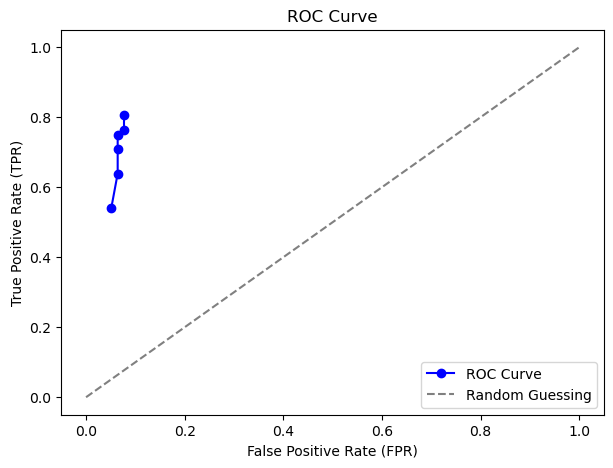

,Threshold,TP,FP,TN,FN,TPR,FPR
0,0.95,39,4,74,33,0.541667,0.051282
1,0.90,46,5,73,26,0.638889,0.064103
2,0.85,51,5,73,21,0.708333,0.064103
3,0.80,54,5,73,18,0.750000,0.064103
4,0.75,55,6,72,17,0.763889,0.076923
5,0.70,58,6,72,14,0.805556,0.076923


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the dataset
file_path = r"C:\Users\shoba\Downloads\roc_data.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Define thresholds
thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

# Prepare a list to store results
roc_data = []

# Compute TP, FP, TN, FN, TPR, and FPR for each threshold
for threshold in thresholds:
    df['prediction_label'] = (df['Prediction'] >= threshold).astype(int)
    
    TP = ((df['prediction_label'] == 1) & (df['True_Label'] == 1)).sum()
    FP = ((df['prediction_label'] == 1) & (df['True_Label'] == 0)).sum()
    TN = ((df['prediction_label'] == 0) & (df['True_Label'] == 0)).sum()
    FN = ((df['prediction_label'] == 0) & (df['True_Label'] == 1)).sum()
    
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Sensitivity / Recall
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # Fall-out
    
    roc_data.append([threshold, TP, FP, TN, FN, TPR, FPR])

# Convert to DataFrame
roc_df = pd.DataFrame(roc_data, columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR'])

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(roc_df['FPR'], roc_df['TPR'], marker='o', linestyle='-', color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')  # Diagonal reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display results
from IPython.display import display
display(roc_df)



### 2b. Write code to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the hamspam.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth) 

#### Code to fit the model using Decicion tree 

,ID,Contains Link,Contains Money Words,Length,Class
0,1,Yes,Yes,Long,Spam
1,2,No,No,Long,Spam
2,3,Yes,No,Long,Ham
3,4,No,Yes,Short,Ham
4,5,Yes,No,Long,Ham


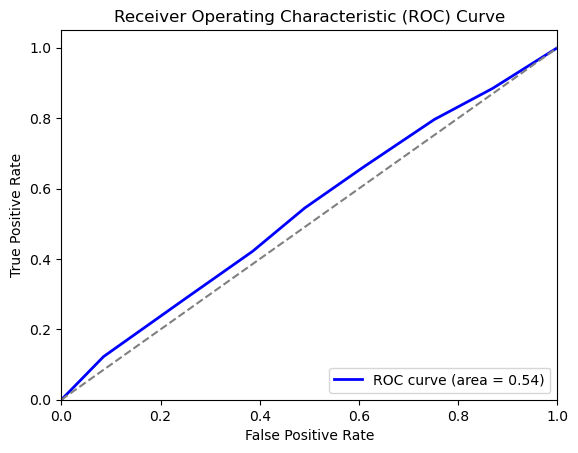

AUC Score: 0.54


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\shoba\Downloads\hamspam.csv.csv"
df = pd.read_csv(file_path)

# Display dataset structure
display(df.head())

# Encode categorical features
label_encoders = {}
for col in ['Contains Link', 'Contains Money Words', 'Length']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable (spam=1, ham=0)
df['Class'] = np.where(df['Class'] == 'Spam', 1, 0)

# Define features and target variable
X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {roc_auc:.2f}')